# [Character Level - Multi Layer Perceptron (MLP) Model](https://youtu.be/TCH_1BHY58I?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

In [7]:
bigram_frequency = {}

for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(chars, chars[1:]):
        bigram = (char1, char2)
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

In [9]:
sorted(bigram_frequency.items(), key=lambda kv:kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
dim1 = set([x[0] for x in bigram_frequency.keys()])
dim2 = set([x[1] for x in bigram_frequency.keys()])
dim = len(dim1.union(dim2))
del dim1, dim2

In [11]:
dim

28

In [12]:
vocab = sorted(set(''.join(words)))

string_to_int = {s:i for i, s in enumerate(vocab)}
string_to_int['<S>'] = 26 
string_to_int['<E>'] = 27

int_to_string = {i:s for s, i in string_to_int.items()}

In [13]:
print(string_to_int)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


In [14]:
print(int_to_string)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


In [15]:
N = torch.zeros((dim, dim), dtype=torch.int32)

In [16]:
for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(chars, chars[1:]):
        index_of_char1 = string_to_int[char1]
        index_of_char2 = string_to_int[char2]

        N[index_of_char1, index_of_char2] += 1

In [246]:
import torch
import torch.nn.functional as F

import random

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data & character lookup tables

In [7]:
with open('./data/names_makemore.txt', 'r') as f:
    words = f.readlines()
    words = [name.strip() for name in words]

print(f'[+] Sample words: {words[:3]}')
print(f'''
[+] Count of names : {len(words)}
[+] Minimum num of letter in a name [{words[[len(w) for w in words].index(min([len(w) for w in words]))]}] : {min(len(w) for w in words)}
[+] Maximum num of letter in a name [{words[[len(w) for w in words].index(max([len(w) for w in words]))]}] : {max(len(w) for w in words)}''')

[+] Sample words: ['emma', 'olivia', 'ava']

[+] Count of names : 32033
[+] Minimum num of letter in a name [an] : 2
[+] Maximum num of letter in a name [muhammadibrahim] : 15


In [9]:
chars = sorted(list(set(''.join(words))))

char_to_index = {s:i+1 for i, s in enumerate(chars)}
char_to_index['.'] = 0

index_to_char = {i:s for s, i in char_to_index.items()}

print(f'{char_to_index=}')
print()
print(f'{index_to_char=}')

char_to_index={'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}

index_to_char={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


## Create dataset 

In [31]:
words[:3]

['emma', 'olivia', 'ava']

In [201]:
# Context length: How many characters do we take to predict the next one?
block_size = 3

X, Y = [], []

verbose = False
for word in words:

    context = [0] * block_size

    if verbose: print(f'\n[+] Target word: {word} | Context: {context}')

    # print(f'\n[+] Target word: {word}')

    for char in word + '.':
        ix = char_to_index[char]
        X.append(context)
        Y.append(ix)
        
        
        # print('\t', ''.join(index_to_char[i] for i in context), '--->', index_to_char[ix])

        if verbose: 
            print('\t', ''.join(index_to_char[i] for i in context), '--->', index_to_char[ix], f' [{ix=}] ', f'\tNew Context: {context}')

        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [202]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [118]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [119]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [203]:
number_of_training_samples = X.shape[0]
print(f'[+] Number of training samples: {number_of_training_samples}')

[+] Number of training samples: 228146


In [121]:
# Lookup Table [Embedding] for our 27 characters in the dataset
# 2 dimentional Embedding

universe_of_dataset = len(char_to_index.keys())
print(f'[+] Count of all the characters in our dataset: {universe_of_dataset}')

C =  torch.randn((universe_of_dataset, 2))

[+] Count of all the characters in our dataset: 27


In [122]:
C.shape

torch.Size([27, 2])

In [123]:
C

tensor([[ 5.1774e-04, -1.5856e+00],
        [ 1.1861e+00, -1.2945e+00],
        [ 7.6653e-01, -8.1116e-01],
        [ 1.8389e-02,  7.0081e-01],
        [-1.4267e+00, -5.5904e-02],
        [ 1.3632e+00,  5.7042e-01],
        [-2.2796e-02, -5.6205e-01],
        [-1.4391e+00,  6.9616e-01],
        [ 3.1499e-01, -2.9157e-01],
        [ 2.1127e+00, -1.6139e-01],
        [-5.8898e-02, -2.8160e-01],
        [-4.8319e-01, -5.3754e-01],
        [-4.0792e-01,  1.4956e-01],
        [ 1.0442e+00,  1.9311e-02],
        [-3.9864e-01, -2.1955e+00],
        [ 1.0596e+00, -1.1798e-01],
        [ 1.0881e+00, -1.0571e+00],
        [ 1.0291e+00, -7.3887e-01],
        [-5.4022e-01, -1.6297e+00],
        [ 7.9206e-01, -1.1254e+00],
        [ 1.0578e+00,  1.2989e+00],
        [ 1.4321e+00, -8.4257e-01],
        [-1.1204e+00, -1.0580e+00],
        [ 1.8601e-01, -1.6432e+00],
        [-8.3020e-01, -9.3834e-01],
        [ 6.4253e-01, -2.2739e-01],
        [ 1.6735e+00, -1.6576e+00]])

In [ ]:
embedding = C[X]

## Scratchpad

In [124]:
indexing = torch.tensor([
    [0,0,0],
    [0,0,5]
])
indexing.shape

torch.Size([2, 3])

In [125]:
C[indexing]

tensor([[[ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00]],

        [[ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00],
         [ 1.3632e+00,  5.7042e-01]]])

In [126]:
embedding.shape

torch.Size([32, 3, 2])

In [129]:
embedding[:3, :, :]

tensor([[[ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00]],

        [[ 5.1774e-04, -1.5856e+00],
         [ 5.1774e-04, -1.5856e+00],
         [ 1.3632e+00,  5.7042e-01]],

        [[ 5.1774e-04, -1.5856e+00],
         [ 1.3632e+00,  5.7042e-01],
         [ 1.0442e+00,  1.9311e-02]]])

In [130]:
embedding[:3].reshape(-1, 6)

tensor([[ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  5.1774e-04,
         -1.5856e+00],
        [ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  1.3632e+00,
          5.7042e-01],
        [ 5.1774e-04, -1.5856e+00,  1.3632e+00,  5.7042e-01,  1.0442e+00,
          1.9311e-02]])

In [136]:
torch.cat(torch.unbind(embedding[:3], 1), 1)

tensor([[ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  5.1774e-04,
         -1.5856e+00],
        [ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  1.3632e+00,
          5.7042e-01],
        [ 5.1774e-04, -1.5856e+00,  1.3632e+00,  5.7042e-01,  1.0442e+00,
          1.9311e-02]])

In [138]:
embedding[:3].view(3, input_layer_nodes)

tensor([[ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  5.1774e-04,
         -1.5856e+00],
        [ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  1.3632e+00,
          5.7042e-01],
        [ 5.1774e-04, -1.5856e+00,  1.3632e+00,  5.7042e-01,  1.0442e+00,
          1.9311e-02]])

## Cont...

In [132]:
input_characters = 3
dim_of_each_character = embedding.shape[-1]
input_layer_nodes = input_characters * dim_of_each_character
W1_neuron_count = 100
b1_count = W1_neuron_count

In [133]:
W1 = torch.randn((input_layer_nodes, W1_neuron_count))
b1 = torch.randn(b1_count)

In [134]:
print(W1.shape, b1.shape)

torch.Size([6, 100]) torch.Size([100])


In [144]:
# All the below results in the same output

h = embedding.reshape(-1, input_layer_nodes)
# h = embedding.view(number_of_training_samples, input_layer_nodes)
# h = torch.cat(torch.unbind(embedding, 1), 1)  # Ineffecient, creates a new tensor 

In [145]:
h.shape

torch.Size([32, 6])

In [146]:
h[:3]

tensor([[ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  5.1774e-04,
         -1.5856e+00],
        [ 5.1774e-04, -1.5856e+00,  5.1774e-04, -1.5856e+00,  1.3632e+00,
          5.7042e-01],
        [ 5.1774e-04, -1.5856e+00,  1.3632e+00,  5.7042e-01,  1.0442e+00,
          1.9311e-02]])

In [147]:
h = torch.tanh(h @ W1 + b1)

In [148]:
h.shape

torch.Size([32, 100])

In [149]:
h[:3]

tensor([[ 0.5841,  0.9558, -0.9977, -0.8406,  0.9524,  0.9989, -0.8731, -0.9998,
          0.9445, -0.8187, -0.9987,  0.9995,  0.9956, -0.9999,  0.9917, -0.6946,
          0.9791,  0.6187, -0.9533,  0.9993, -1.0000, -0.9996,  0.9777,  0.9698,
          0.9997, -0.7256,  0.9166,  0.8952,  0.7544,  0.9973,  0.8283, -0.8851,
         -0.8893, -0.8993,  0.9789, -0.9999,  0.9794, -0.9989,  0.9290,  0.9151,
          0.8404, -0.7167, -1.0000, -0.9658, -1.0000, -0.9863, -0.9804, -0.9809,
         -0.9652, -0.9999,  1.0000,  0.4824, -0.9997, -0.3055,  0.8562, -0.9491,
          0.9944, -0.9916,  0.9674, -0.3194,  0.9989, -0.2103,  0.9987,  0.9813,
          0.9428, -0.1953,  0.9982, -0.9908,  0.3620,  0.5408,  0.9669,  0.4096,
         -0.6426,  0.8355, -0.9802,  0.9990,  0.9826, -0.9973,  0.2495,  0.6757,
         -0.9401, -0.9994,  0.9881,  0.9016,  1.0000,  0.5494,  0.9997,  0.6626,
         -0.9296,  0.8944,  0.9947,  0.9886,  0.9941, -0.9809, -0.1845, -0.9987,
          0.4938,  0.9168,  

In [150]:
W2 = torch.randn((W1_neuron_count, universe_of_dataset))
b2 = torch.randn(universe_of_dataset)

In [151]:
W2.shape, b2.shape

(torch.Size([100, 27]), torch.Size([27]))

In [152]:
W2[:3]

tensor([[ 0.1533, -1.4076,  0.6130,  0.3256,  1.1025,  0.9055, -0.2086, -0.3478,
         -1.6699, -0.2052, -0.1088,  1.0358,  0.2905, -0.4403,  0.3645, -1.3251,
          0.1059,  1.6745, -0.1166, -0.8332, -0.5927, -0.7017, -0.4203,  0.7602,
         -1.4495,  0.3030, -0.1988],
        [ 0.6893, -1.2841, -0.8280, -0.6584, -1.2056,  0.8156,  0.5980, -1.2890,
          0.4058, -0.8934, -0.4999, -1.0624, -0.8563,  1.2330, -1.5288,  0.7924,
          0.2550, -0.5486,  0.2767,  1.8486,  0.2061,  0.3098,  1.4978, -0.0370,
          0.7024,  0.1295,  1.7809],
        [ 1.0956,  0.5621,  0.6076,  2.1717, -1.3975, -0.3196, -0.4364, -1.5148,
         -0.9825, -0.1574,  0.5972,  0.4130,  0.5125,  1.9912, -1.8553, -1.1776,
         -0.7881, -0.0775, -1.1223, -1.1107,  0.0135, -0.2857,  0.0775, -0.4805,
         -2.0693, -0.1507, -0.0413]])

In [153]:
b2[:3]

tensor([-0.3075, -0.4620,  1.5089])

In [154]:
logits = h @ W2 + b2 

In [155]:
logits.shape

torch.Size([32, 27])

In [156]:
logits[:3]

tensor([[ 6.9376e+00, -8.7784e+00, -5.7033e+00, -6.5346e+00, -1.8080e+01,
         -1.4963e+00, -3.1099e+00,  5.3461e+00,  1.3374e+00, -9.2681e-01,
          3.0379e+00, -3.1130e+00, -1.3213e+01,  9.7740e+00,  2.1620e-01,
          6.8425e+00,  8.2634e+00,  1.6977e+01,  8.0083e+00,  4.0456e+00,
         -1.5062e-02,  9.5005e+00,  5.7541e+00, -7.5671e+00,  1.5122e+01,
         -9.7663e-01, -5.5226e-01],
        [-3.7751e-01, -2.8677e+00,  6.9318e-01,  2.8065e+00,  3.7315e+00,
          6.9475e+00, -8.5734e+00,  9.2024e+00,  4.5164e+00, -1.1663e+01,
         -6.5291e+00,  3.0835e+00, -1.0916e+01,  7.2365e+00, -1.5268e+00,
          6.8691e-01,  4.0278e+00,  1.2934e+01, -5.1158e+00,  1.1352e+01,
         -3.6105e+00,  9.0208e+00,  1.0366e+00,  6.3214e-01,  9.9242e+00,
         -7.3668e+00,  9.8220e+00],
        [-1.7844e+01, -1.9184e+00,  1.6713e+00, -9.6620e-01,  2.8576e+00,
         -1.4116e+01, -3.8384e+00,  1.3505e+01,  8.1813e+00,  2.4750e+00,
         -2.2316e+00, -5.3189e+00, -9.59

In [157]:
counts = logits.exp()  # fake count

In [158]:
counts.shape

torch.Size([32, 27])

In [159]:
probs = counts / counts.sum(1, keepdim=True)

In [160]:
probs.shape

torch.Size([32, 27])

In [161]:
probs[:3]  # Probability of occurance of all the 27 characters in our dataset

tensor([[3.7698e-05, 5.6357e-12, 1.2202e-10, 5.3142e-11, 5.1464e-16, 8.1943e-09,
         1.6322e-09, 7.6761e-06, 1.3937e-07, 1.4483e-08, 7.6330e-07, 1.6271e-09,
         6.6834e-14, 6.4291e-04, 4.5421e-08, 3.4279e-05, 1.4194e-04, 8.6333e-01,
         1.0998e-04, 2.0909e-06, 3.6043e-08, 4.8907e-04, 1.1544e-05, 1.8923e-11,
         1.3519e-01, 1.3779e-08, 2.1063e-08],
        [1.2265e-06, 1.0167e-07, 3.5782e-06, 2.9612e-05, 7.4676e-05, 1.8615e-03,
         3.3825e-10, 1.7749e-02, 1.6371e-04, 1.5392e-11, 2.6126e-09, 3.9063e-05,
         3.2484e-11, 2.4853e-03, 3.8864e-07, 3.5558e-06, 1.0043e-04, 7.4084e-01,
         1.0737e-08, 1.5233e-01, 4.8373e-08, 1.4802e-02, 5.0442e-06, 3.3663e-06,
         3.6531e-02, 1.1305e-09, 3.2981e-02],
        [7.6992e-15, 6.3537e-08, 2.3015e-06, 1.6465e-07, 7.5377e-06, 3.2040e-13,
         9.3150e-09, 3.1719e-01, 1.5462e-03, 5.1413e-06, 4.6454e-08, 2.1194e-09,
         1.6580e-07, 1.1154e-04, 1.3996e-03, 3.2696e-07, 7.7025e-04, 8.3548e-04,
         2.8653e-

## Scratchpad

In [162]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [164]:
torch.arange(number_of_training_samples)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [167]:
probs[torch.arange(number_of_training_samples), Y].shape

torch.Size([32])

In [165]:
probs[torch.arange(number_of_training_samples), Y]

tensor([8.1943e-09, 2.4853e-03, 1.1154e-04, 6.5960e-09, 1.2792e-17, 3.4279e-05,
        1.5513e-11, 7.5409e-04, 1.4006e-14, 5.1782e-03, 1.1739e-18, 1.5687e-14,
        5.6357e-12, 7.1476e-07, 1.5031e-03, 1.5549e-09, 1.4483e-08, 1.6539e-04,
        7.0872e-11, 7.9277e-11, 4.0667e-09, 1.3159e-13, 3.9527e-11, 2.2369e-10,
        1.8957e-09, 2.0909e-06, 2.4671e-05, 2.4834e-05, 1.4497e-09, 1.5534e-07,
        3.5439e-12, 3.2597e-18])

In [166]:
probs

tensor([[3.7698e-05, 5.6357e-12, 1.2202e-10, 5.3142e-11, 5.1464e-16, 8.1943e-09,
         1.6322e-09, 7.6761e-06, 1.3937e-07, 1.4483e-08, 7.6330e-07, 1.6271e-09,
         6.6834e-14, 6.4291e-04, 4.5421e-08, 3.4279e-05, 1.4194e-04, 8.6333e-01,
         1.0998e-04, 2.0909e-06, 3.6043e-08, 4.8907e-04, 1.1544e-05, 1.8923e-11,
         1.3519e-01, 1.3779e-08, 2.1063e-08],
        [1.2265e-06, 1.0167e-07, 3.5782e-06, 2.9612e-05, 7.4676e-05, 1.8615e-03,
         3.3825e-10, 1.7749e-02, 1.6371e-04, 1.5392e-11, 2.6126e-09, 3.9063e-05,
         3.2484e-11, 2.4853e-03, 3.8864e-07, 3.5558e-06, 1.0043e-04, 7.4084e-01,
         1.0737e-08, 1.5233e-01, 4.8373e-08, 1.4802e-02, 5.0442e-06, 3.3663e-06,
         3.6531e-02, 1.1305e-09, 3.2981e-02],
        [7.6992e-15, 6.3537e-08, 2.3015e-06, 1.6465e-07, 7.5377e-06, 3.2040e-13,
         9.3150e-09, 3.1719e-01, 1.5462e-03, 5.1413e-06, 4.6454e-08, 2.1194e-09,
         1.6580e-07, 1.1154e-04, 1.3996e-03, 3.2696e-07, 7.7025e-04, 8.3548e-04,
         2.8653e-

## Cont...

In [168]:
loss = -probs[torch.arange(number_of_training_samples), Y].log().mean()

In [169]:
loss

tensor(19.8893)

## Putting it all together - 1 

In [204]:
X.shape, Y.shape  # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [236]:
g = torch.Generator().manual_seed(2147483647)  # For reproducibility

C =  torch.randn((universe_of_dataset, 2), generator=g)

W1 = torch.randn((input_layer_nodes, W1_neuron_count), generator=g)
b1 = torch.randn(b1_count, generator=g)

W2 = torch.randn((W1_neuron_count, universe_of_dataset), generator=g)
b2 = torch.randn(universe_of_dataset, generator=g)

parameters = [C, W1, b1, W2, b2]

In [237]:
sum(p.nelement() for p in parameters)  # Number of parameters in total

3481

In [238]:
for p in parameters:
    p.requires_grad = True

### Normal

In [214]:
no_of_epoc = 101

for epoc in range(no_of_epoc):

    # FORWARD PASS
    
    embedding = C[X]  # [32, 3, 2]
    h = embedding.reshape(-1, input_layer_nodes)  # [32, 6]
    h = torch.tanh(h @ W1 + b1)  # [32, 100]
    logits = h @ W2 + b2  # [32, 27]
    
    # counts = logits.exp()  # fake count  # [32, 27]
    # probs = counts / counts.sum(1, keepdim=True)  # [32, 27]
    # loss = -probs[torch.arange(number_of_training_samples), Y].log().mean()
    
    # All the above 3 lines can be replaced with below single line, which basically does the same thing.
    # Because we are usign cross entropy, the forward pass, backwoard pass are more efficient and numerically stable also
    loss = F.cross_entropy(logits, Y)
    
    
    # BACKWARD PASS
    
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad
    
    if epoc%10==0:
        print(f'[+] Epoc: {epoc:<3} | Loss: {round(loss.item(), 4)}')


[+] Epoc: 0   | Loss: 19.505229949951172
[+] Epoc: 10  | Loss: 10.709586143493652
[+] Epoc: 20  | Loss: 8.329227447509766
[+] Epoc: 30  | Loss: 6.795018196105957
[+] Epoc: 40  | Loss: 5.8031463623046875
[+] Epoc: 50  | Loss: 5.105468273162842
[+] Epoc: 60  | Loss: 4.587378025054932
[+] Epoc: 70  | Loss: 4.202611923217773
[+] Epoc: 80  | Loss: 3.9281277656555176
[+] Epoc: 90  | Loss: 3.7286949157714844
[+] Epoc: 100 | Loss: 3.5755467414855957


### Mini batch version

In [221]:
no_of_epoc = 101

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad
    
    if epoc%10==0:
        print(f'[+] Epoc: {epoc:<3} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0   | Loss: 6.2823
[+] Epoc: 10  | Loss: 3.1717
[+] Epoc: 20  | Loss: 4.045
[+] Epoc: 30  | Loss: 4.2734
[+] Epoc: 40  | Loss: 3.5907
[+] Epoc: 50  | Loss: 2.7597
[+] Epoc: 60  | Loss: 3.6084
[+] Epoc: 70  | Loss: 3.7197
[+] Epoc: 80  | Loss: 2.7616
[+] Epoc: 90  | Loss: 3.0488
[+] Epoc: 100 | Loss: 3.0964


### Find good Learning rate

In [232]:
no_of_epoc = 5001

count_of_learning_rate = no_of_epoc

In [233]:
lre = torch.linspace(-3, 0, count_of_learning_rate)
lrs = 10**lre

In [234]:
lrs

tensor([0.0010, 0.0010, 0.0010,  ..., 0.9972, 0.9986, 1.0000])

In [ ]:
for p in parameters:
    p.requires_grad = True

In [229]:
track_lr = []
track_loss = []

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()

    # UPDATE
    learning_rate = epoc
    learning_rate = lrs[learning_rate]
    
    for p in parameters:
        p.data += -learning_rate * p.grad

    # TRACKING
    track_lr.append(learning_rate)
    track_loss.append(loss.item())
    
    if epoc%100==0:
        print(f'[+] Epoc: {epoc:<3} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0   | Loss: 7.9177
[+] Epoc: 50  | Loss: 8.9742
[+] Epoc: 100 | Loss: 8.5239
[+] Epoc: 150 | Loss: 7.0827
[+] Epoc: 200 | Loss: 6.9905
[+] Epoc: 250 | Loss: 5.9727
[+] Epoc: 300 | Loss: 4.0957
[+] Epoc: 350 | Loss: 4.5823
[+] Epoc: 400 | Loss: 3.6978
[+] Epoc: 450 | Loss: 4.5401
[+] Epoc: 500 | Loss: 3.7307
[+] Epoc: 550 | Loss: 2.6666
[+] Epoc: 600 | Loss: 2.7513
[+] Epoc: 650 | Loss: 2.5661
[+] Epoc: 700 | Loss: 3.0738
[+] Epoc: 750 | Loss: 2.8184
[+] Epoc: 800 | Loss: 3.0499
[+] Epoc: 850 | Loss: 2.954
[+] Epoc: 900 | Loss: 4.5191
[+] Epoc: 950 | Loss: 4.4985


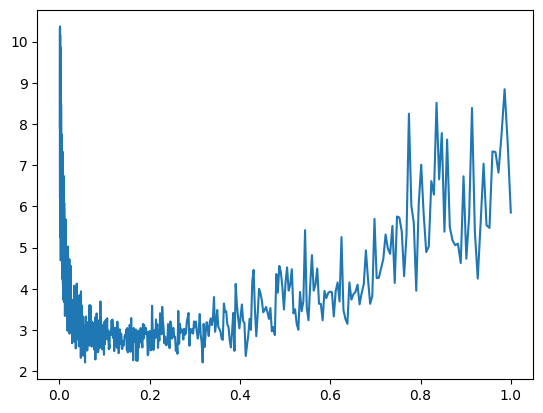

In [230]:
plt.plot(track_lr, track_loss)

From the above chart we can see that a good learning rate lies between 0.1 to 0.2

### Final run post we find a good learning rate

In [243]:
no_of_epoc = 5001

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()

    # UPDATE with decay
    for p in parameters:
        # p.data += -0.1 * p.grad
        # p.data += -0.01 * p.grad
        p.data += -0.005 * p.grad
    
    if epoc%100==0:
        print(f'[+] Epoc: {epoc:<3} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0   | Loss: 2.5738
[+] Epoc: 100 | Loss: 2.2472
[+] Epoc: 200 | Loss: 2.5156
[+] Epoc: 300 | Loss: 2.4415
[+] Epoc: 400 | Loss: 1.9659
[+] Epoc: 500 | Loss: 2.5404
[+] Epoc: 600 | Loss: 2.5176
[+] Epoc: 700 | Loss: 2.6307
[+] Epoc: 800 | Loss: 2.4096
[+] Epoc: 900 | Loss: 2.3189
[+] Epoc: 1000 | Loss: 2.3188
[+] Epoc: 1100 | Loss: 2.364
[+] Epoc: 1200 | Loss: 2.4091
[+] Epoc: 1300 | Loss: 2.5052
[+] Epoc: 1400 | Loss: 2.1849
[+] Epoc: 1500 | Loss: 2.3728
[+] Epoc: 1600 | Loss: 2.4845
[+] Epoc: 1700 | Loss: 2.5339
[+] Epoc: 1800 | Loss: 2.7838
[+] Epoc: 1900 | Loss: 2.8334
[+] Epoc: 2000 | Loss: 2.1521
[+] Epoc: 2100 | Loss: 2.3868
[+] Epoc: 2200 | Loss: 2.2238
[+] Epoc: 2300 | Loss: 2.6283
[+] Epoc: 2400 | Loss: 2.4161
[+] Epoc: 2500 | Loss: 2.5482
[+] Epoc: 2600 | Loss: 2.2086
[+] Epoc: 2700 | Loss: 2.3215
[+] Epoc: 2800 | Loss: 2.2914
[+] Epoc: 2900 | Loss: 2.7441
[+] Epoc: 3000 | Loss: 2.3193
[+] Epoc: 3100 | Loss: 2.6477
[+] Epoc: 3200 | Loss: 2.5321
[+] Epoc: 3300 | Loss

In [244]:
# Loss on full data

embedding = C[X[ix]]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y[ix])
loss

tensor(2.3669, grad_fn=<NllLossBackward0>)

## Train split, Dev/Validation split, Test split
80%, 10%, 10%

In [248]:
def build_dataset(words, block_size=3):
    # Context length: How many characters do we take to predict the next one?
    
    X, Y = [], []
    
    verbose = False
    for word in words:
    
        context = [0] * block_size
    
        for char in word + '.':
            ix = char_to_index[char]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]  # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)

    return X, Y

In [257]:
def create_train_val_test_split(lst):
    total_len = len(lst)
    first_end = int(total_len * 0.8)
    second_end = int(total_len * 0.9)
    
    train_set = lst[:first_end]
    val_set = lst[first_end:second_end]
    test_set = lst[second_end:]
    
    return train_set, val_set, test_set

In [343]:
random.seed(42)
random.shuffle(words)

train_set, val_set, test_set = create_train_val_test_split(lst=words)

In [344]:
len(words), len(train_set) + len(val_set) + len(test_set)

(32033, 32033)

In [345]:
X_train, Y_train           = build_dataset(train_set)
X_validation, Y_validation = build_dataset(val_set)
X_test, Y_test             = build_dataset(test_set)

torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])


In [358]:
input_characters = 3
W1_neuron_count = 300
b1_count = W1_neuron_count
no_of_dim_of_a_character = 10

In [369]:
g = torch.Generator().manual_seed(2147483647)  # For reproducibility

W1 = torch.randn((input_layer_nodes, W1_neuron_count), generator=g)
b1 = torch.randn(b1_count, generator=g)

W2 = torch.randn((W1_neuron_count, universe_of_dataset), generator=g)
b2 = torch.randn(universe_of_dataset, generator=g)

In [370]:
C =  torch.randn((universe_of_dataset, no_of_dim_of_a_character), generator=g)

embedding = C[X]

parameters = [C, W1, b1, W2, b2]

In [371]:
dim_of_each_character = embedding.shape[-1]
input_layer_nodes = input_characters * dim_of_each_character

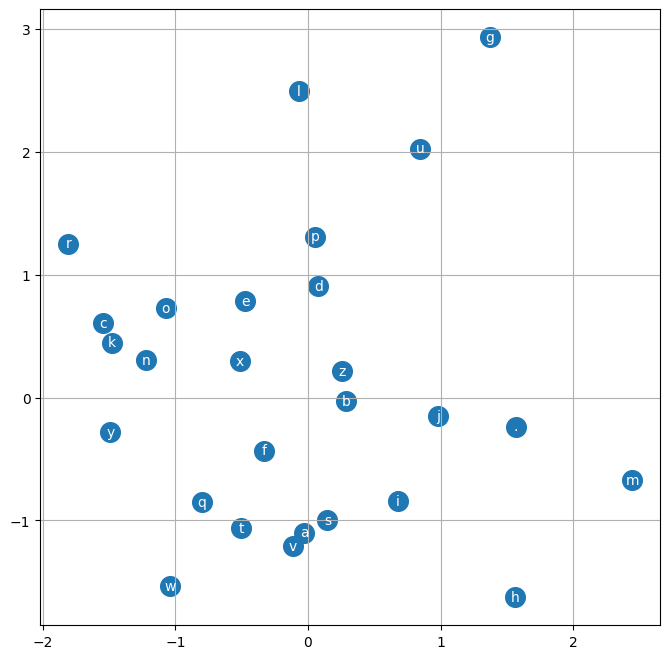

In [332]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(
        C[i, 0].item(),
        C[i, 1].item(),
        index_to_char[i],
        ha='center',
        va='center',
        color='white'
    )
plt.grid('minor')

In [362]:
sum(p.nelement() for p in parameters)  # Number of parameters in total

10497

In [372]:
embedding.shape

torch.Size([228146, 3, 10])

In [373]:
h.shape, W1.shape

(torch.Size([32, 30]), torch.Size([30, 300]))

In [374]:
for p in parameters:
    p.requires_grad = True

In [376]:
no_of_epoc = 50_001
lr = 0.1

track_loss, track_steps = [], []

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X_train.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X_train[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()

    if epoc%10_000==0:
        lr /= 2
        
    for p in parameters:
        p.data += -lr * p.grad

    # TRACKING
    track_loss.append(loss.log10().item())
    track_steps.append(epoc)
    
    if epoc%5000==0:
        print(f'[+] Epoc: {epoc:<5} | lr: {round(lr, 4):<5} | Loss: {round(loss.item(), 4)}')

# print(f'\n[+] LOSS: {loss.item()}')

[+] Epoc: 0     | lr: 0.05  | Loss: 2.2264
[+] Epoc: 5000  | lr: 0.05  | Loss: 2.4845
[+] Epoc: 10000 | lr: 0.025 | Loss: 2.0825
[+] Epoc: 15000 | lr: 0.025 | Loss: 2.0277
[+] Epoc: 20000 | lr: 0.0125 | Loss: 2.011
[+] Epoc: 25000 | lr: 0.0125 | Loss: 2.7406
[+] Epoc: 30000 | lr: 0.0063 | Loss: 2.2362
[+] Epoc: 35000 | lr: 0.0063 | Loss: 2.1868
[+] Epoc: 40000 | lr: 0.0031 | Loss: 2.1829
[+] Epoc: 45000 | lr: 0.0031 | Loss: 2.4066
[+] Epoc: 50000 | lr: 0.0016 | Loss: 2.0889


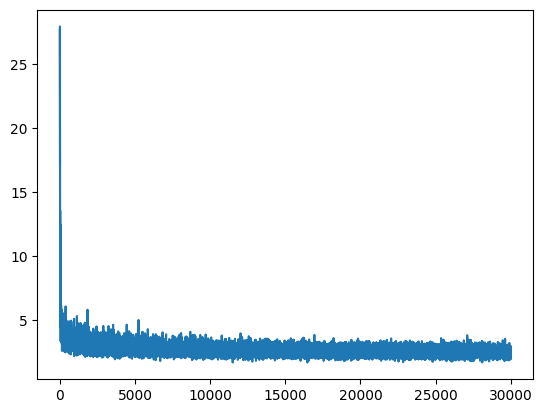

In [336]:
plt.plot(track_steps, track_loss)

In [377]:
# Loss on Validation set

embedding = C[X_validation]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_validation)
loss.item()

2.239835500717163

In [378]:
# Loss on Train set

embedding = C[X_train]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
loss.item()

2.2239675521850586

In [379]:
# Loss on Test set

embedding = C[X_test]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_test)
loss.item()

2.2441213130950928

### Visualising character embedding 

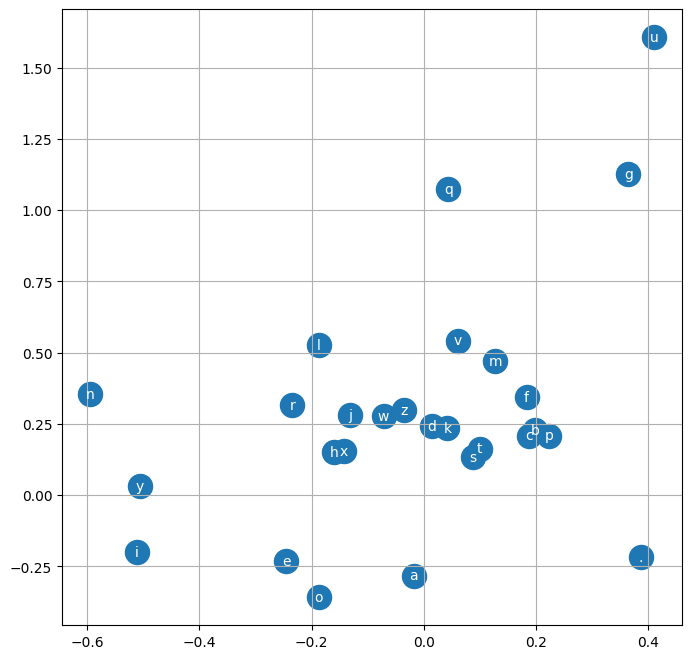

In [342]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=300)
for i in range(C.shape[0]):
    plt.text(
        C[i, 0].item(),
        C[i, 1].item(),
        index_to_char[i],
        ha='center',
        va='center',
        color='white'
    )
plt.grid('minor')

## Sample from the model

In [381]:
g = torch.Generator().manual_seed(2147483647 + 10)  # For reproducibility

for _ in range(20):
    out = []
    context = [0]*block_size  # initialize with "..."
    
    while True:
        emb = C[torch.tensor([context])]  # (1, block_size, d)
        h = torch.tanh(emb.reshape(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:
            break

    print(f'[+] {"".join(index_to_char[i] for i in out)}')

[+] mora.
[+] mayan.
[+] see.
[+] med.
[+] ryla.
[+] rethrstendrari.
[+] aderedielii.
[+] shi.
[+] jen.
[+] edeighan.
[+] naraylyn.
[+] malte.
[+] ciosaubrigshimiel.
[+] jenir.
[+] jelipanterorius.
[+] macder.
[+] yaruimehsyn.
[+] ajaysenyan.
[+] halisa.
[+] yansuf.
